<a href="https://colab.research.google.com/github/ivalozkaMIIGAiK/network/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


## 1.3. Визуализируем часть данных из датасета

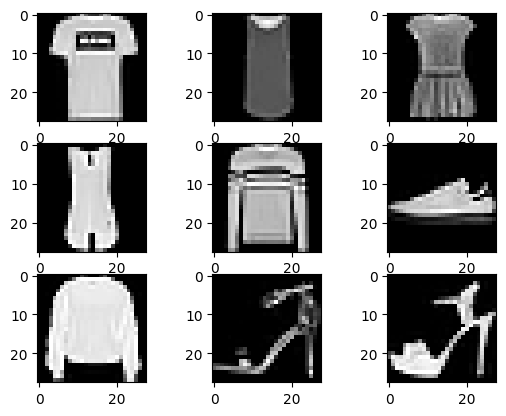

In [3]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [5]:
# 1.1. Устанавливаем необходимые зависимости
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


# 1.3. Подготовка данных
# Нормализация и добавление размерности канала
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255.0
testX = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Преобразование меток в one-hot encoding
num_classes = 10
trainy = to_categorical(trainy, num_classes)
testy = to_categorical(testy, num_classes)

# 1.4. Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Train: X = (60000, 28, 28)
Test: X = (10000, 28, 28)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [6]:
history = model.fit(
    trainX, trainy,
    batch_size=64,
    epochs=10,
    validation_data=(testX, testy),
    verbose=1
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.7389 - loss: 0.7212 - val_accuracy: 0.8656 - val_loss: 0.3748
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.8834 - loss: 0.3257 - val_accuracy: 0.8809 - val_loss: 0.3288
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.9017 - loss: 0.2715 - val_accuracy: 0.8917 - val_loss: 0.2908
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.9118 - loss: 0.2382 - val_accuracy: 0.9003 - val_loss: 0.2658
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 89s 68ms/step - accuracy: 0.9204 - loss: 0.2164 - val_accuracy: 0.8918 - val_loss: 0.2832
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 61ms/step - accuracy: 0.9275 - loss: 0.1954 - val_accuracy: 0.9115 - val_loss: 0.2487
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.9348 - loss: 0.1734 - val_accuracy: 0.9140 - val_loss: 0.2434
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9427 - loss: 0.1563 - 

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

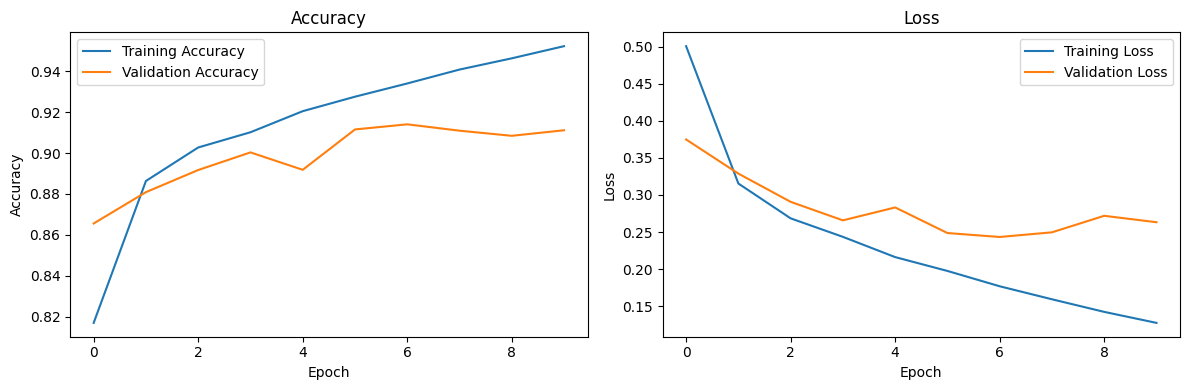

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Изображение: футболка.jpg
Предсказанный класс: Футболка/топ (75.1%)
Распределение вероятностей:
Футболка/топ: 75.1%
Брюки: 0.0%
Свитер: 15.4%
Платье: 0.0%
Пальто: 0.7%
Сандалии: 0.0%
Рубашка: 8.6%
Кроссовки: 0.0%
Сумка: 0.1%
Ботильоны: 0.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Изображение: брюки.jpg
Предсказанный класс: Сумка (94.9%)
Распределение вероятностей:
Футболка/топ: 0.1%
Брюки: 4.8%
Свитер: 0.0%
Платье: 0.0%
Пальто: 0.2%
Сандалии: 0.0%
Рубашка: 0.0%
Кроссовки: 0.0%
Сумка: 94.9%
Ботильоны: 0.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Изображение: платье.jpg
Предсказанный класс: Свитер (37.3%)
Распределение вероятностей:
Футболка/топ: 35.3%
Брюки: 0.0%
Свитер: 37.3%
Платье: 0.6%
Пальто: 0.4%
Сандалии: 0.0%
Рубашка: 25.4%
Кроссовки: 0.0%
Сумка: 0.9%
Ботильоны: 0.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Изображение: кроссовки.jpg
Предсказанный класс: Сандалии (69.3%)
Распределение вероятностей:
Футболка/топ: 9.2%
Брюки: 0.0%
Свитер: 0.0%
Пл

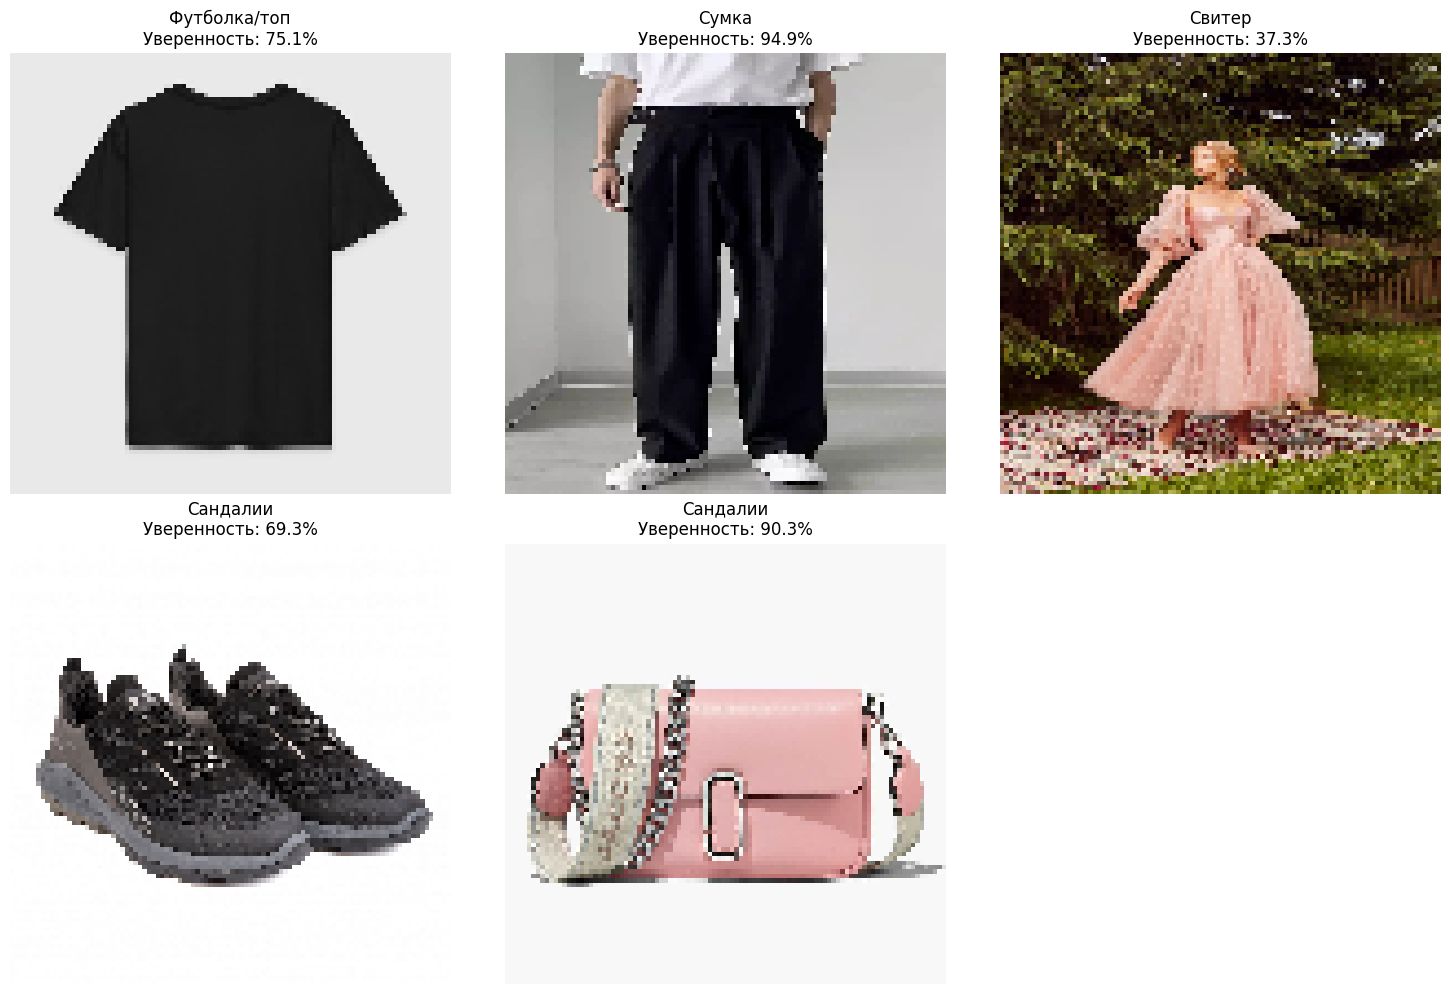

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Метки классов Fashion MNIST
class_labels = [
    'Футболка/топ', 'Брюки', 'Свитер', 'Платье', 'Пальто',
    'Сандалии', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботильоны'
]

# Функция для загрузки и подготовки изображения
def prepare_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Нормализация
    img_array = 1 - img_array  # Инверсия цветов (Fashion MNIST имеет белый фон)
    return img_array

# Пути к 5 тестовым изображениям разных классов
test_images = [
    'футболка.jpg',    # Футболка
    'брюки.jpg',   # Брюки
    'платье.jpg',     # Платье
    'кроссовки.jpg',   # Кроссовки
    'сумка.jpg'        # Сумка
]

# Создаем график для отображения результатов
plt.figure(figsize=(15, 10))

for i, img_path in enumerate(test_images):
    try:
        # Подготовка изображения
        img_array = prepare_image(img_path)

        # Получение предсказания
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0]) * 100

        # Визуализация
        plt.subplot(2, 3, i+1)
        img = image.load_img(img_path, target_size=(100, 100))
        plt.imshow(img, cmap='gray')
        plt.title(f'{class_labels[predicted_class]}\nУверенность: {confidence:.1f}%')
        plt.axis('off')

        # Вывод информации в консоль
        print(f"\nИзображение: {os.path.basename(img_path)}")
        print(f"Предсказанный класс: {class_labels[predicted_class]} ({confidence:.1f}%)")
        print("Распределение вероятностей:")
        for class_idx, prob in enumerate(predictions[0]):
            print(f"{class_labels[class_idx]}: {prob*100:.1f}%")

    except Exception as e:
        print(f"Ошибка при обработке {img_path}: {str(e)}")

plt.tight_layout()
plt.show()

In [16]:
!pip install gradio
import numpy as np
import cv2
import gradio as gr
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Метки классов Fashion MNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Функция для предсказания
def predict_image(img):
    # Подготовка изображения
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Конвертация в grayscale
    img = cv2.resize(img, (28, 28))  # Изменение размера
    img = np.invert(img)  # Инверсия цветов (как в Fashion MNIST)
    img = img.astype('float32') / 255.0  # Нормализация
    img = img.reshape(1, 28, 28, 1)  # Добавление размерностей

    # Загрузка модели (если не загружена)
    if 'model' not in globals():
        global model
        model = load_model('fashion_mnist_cnn.h5')

    # Получение предсказания
    preds = model.predict(img)

    # Формирование результата с процентами уверенности
    confidences = {
        class_names[i]: float(preds[0][i])
        for i in range(len(class_names))
    }

    # Визуализация обработанного изображения (для отладки)
    print("\nОбработанное изображение:")
    cv2_imshow(img[0, :, :, 0] * 255)

    return confidences

# Создание интерфейса
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(label="Загрузите изображение предмета одежды"),
    outputs=gr.Label(num_top_classes=3, label="Предсказание"),
    examples=[
        ["футболка.jpg"],
        ["брюки.jpg"],
        ["платье.jpg"],
        ["кроссовки.jpg"],
        ["сумка.jpg"]
    ],
    title="Классификатор Fashion MNIST",
    description="Загрузите изображение предмета одежды для классификации"
)

# Запуск интерфейса
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://37aaf1a78013911d0a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [14]:
import kagglehub
path = kagglehub.dataset_download("ashishsaxena2209/animal-image-datasetdog-cat-and-panda")

In [38]:
import os
import random
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt

# Путь к датасету
DATASET_PATH = "/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals"
allowed_classes = ['cats', 'dogs', 'panda']

# Получение путей к изображениям
imagePaths = list(paths.list_images(DATASET_PATH))
imagePaths = [p for p in imagePaths if p.split(os.path.sep)[-2] in allowed_classes]
random.shuffle(imagePaths)

print(f"[INFO] Найдено изображений: {len(imagePaths)}")

# Загрузка изображений и меток
data = []
labels = []
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32))
    image = image.flatten()
    data.append(image)
    labels.append(label)

# Преобразование и нормализация данных
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

# Преобразование меток в one-hot
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Разделение на обучающую и тестовую выборки
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# Построение модели
model = Sequential()
model.add(Dense(1024, input_shape=(32*32*3,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

# Компиляция модели
INIT_LR = 0.001
EPOCHS = 100

model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=INIT_LR),
              metrics=["accuracy"])

# Колбэки
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Обучение модели
history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=EPOCHS,
    batch_size=64,
    callbacks=[checkpoint, early_stop]
)


[INFO] Найдено изображений: 3000
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: 'Моя модель_sequential_8_dense_22_kernel_momentum' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$

In [37]:
# Преобразуем данные в массивы NumPy и нормализуем
trainX = np.array(trainX, dtype="float") / 255.0
testX = np.array(testX, dtype="float") / 255.0
trainY = np.array(trainY)
testY = np.array(testY)

# Изменим форму данных обратно в 3D (32x32x3)
trainX = trainX.reshape(-1, 32, 32, 3)
testX = testX.reshape(-1, 32, 32, 3)

# Создание модели
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(lb.classes_), activation="softmax")
])

# Компиляция модели
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Определим колбэк для сохранения наилучшей модели
checkpoint = ModelCheckpoint("my_model.h5", monitor="val_accuracy", save_best_only=True, verbose=1)

# Обучение модели
history = model.fit(trainX, trainY,
              validation_data=(testX, testY),
              epochs=20,
              batch_size=32,
              callbacks=[checkpoint],
              verbose=1)

AttributeError: 'dict' object has no attribute 'Sequential'

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Блок 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Блок 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Блок 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Полносвязные слои
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(lb.classes_), activation='softmax'))

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
checkpoint = ModelCheckpoint("vgg_like_best_model.h5",
                             monitor="val_accuracy",
                             verbose=1,
                             save_best_only=True,
                             mode="max")

# Обучение с колбэком
history = model.fit(trainX, trainY,
              validation_data=(testX, testY),
              batch_size=32,
              epochs=30,
              verbose=1,
              callbacks=[checkpoint])

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.3476 - loss: 1.1000
Epoch 1: val_accuracy improved from -inf to 0.32133, saving model to vgg_like_best_model.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 47s 622ms/step - accuracy: 0.3475 - loss: 1.1000 - val_accuracy: 0.3213 - val_loss: 1.0996
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.3386 - loss: 1.0988
Epoch 2: val_accuracy improved from 0.32133 to 0.34000, saving model to vgg_like_best_model.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 55s 238ms/step - accuracy: 0.3384 - loss: 1.0988 - val_accuracy: 0.3400 - val_loss: 1.0986
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.3471 - loss: 1.0983
Epoch 3: val_accuracy did not improve from 0.34000
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 235ms/step - accuracy: 0.3469 - loss: 1.0983 - val_accuracy: 0.3400 - val_loss: 1.0986
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.3425 - loss: 1.0986
Epoch 4: val_accuracy did not improve from 0.34000
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 253ms/step - accuracy: 0.3425 - loss: 1.0986 - val_accuracy: 0.3213 - val_loss: 1.0989
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.3447 - loss: 1.0984
Epoch 5: val_accuracy did not improve from 0.34000
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 236ms/step - accuracy: 0.3445 - loss: 1.0984 - val_accuracy: 0.3213 - val_loss: 1.0988
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.3367 - loss: 1.0985
Epoch 6: val_accuracy did not i

## 2.3. Сохраните полученные модели

## 2.4. Загрузите обученную модель из прошлой практической работы


In [21]:
from tensorflow.keras.models import load_model
pred_model = load_model('best_model.h5')
my_model = load_model('my_model.h5')
cnn_model = load_model('vgg_like_best_model.h5')


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [35]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os


# Метки классов
class_labels = ['cat', 'dog', 'panda']

# Путь к 15 изображениям
TEST_IMAGES_PATH = "/content/animals"  # Папка с 15 тестовыми изображениями
image_paths = list(paths.list_images(TEST_IMAGES_PATH))[:15]

# Предсказания
def preprocess_image(imagePath, flatten=False):
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32))
    if flatten:
        image = image.flatten()
    image = image.astype("float32") / 255.0
    if flatten:
        image = np.expand_dims(image, axis=0)
    else:
        image = np.expand_dims(image, axis=0)
    return image

# Отображение результатов
for imagePath in image_paths:
    img_name = os.path.basename(imagePath)

    # Для плотных моделей (flatten input)
    image_dense = preprocess_image(imagePath, flatten=True)

    # Для сверточной модели (4D tensor: H x W x C)
    image_cnn = preprocess_image(imagePath, flatten=False)

    # Предсказания
    pred1 = class_labels[np.argmax(pred_model.predict(image_dense))]
    pred2 = class_labels[np.argmax(my_model.predict(image_dense))]
    pred3 = class_labels[np.argmax(cnn_model.predict(image_cnn))]

    # Показ изображения и предсказаний
    img = cv2.imread(imagePath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(f"{img_name}\nDense: {pred1}, MyModel: {pred2}, CNN: {pred3}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


ValueError: 'Моя модель' is not a valid root scope name. A root scope name has to match the following pattern: ^[A-Za-z0-9.][A-Za-z0-9_.\\/>-]*$

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

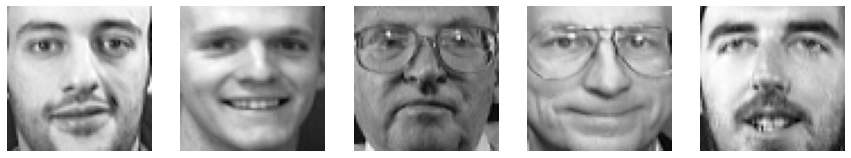

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

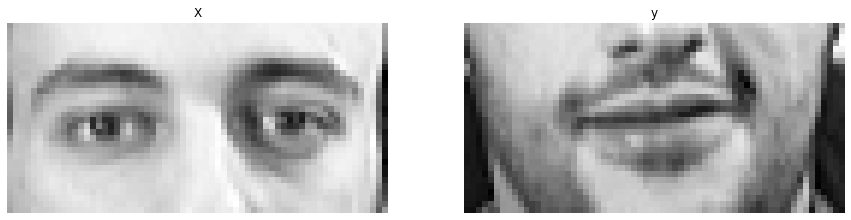

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
# Ваш код здесь

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
# Ваш код здесь

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Ваш код здесь

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь

## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
# Ваш код здесь

Отрисуйте все предсказания.

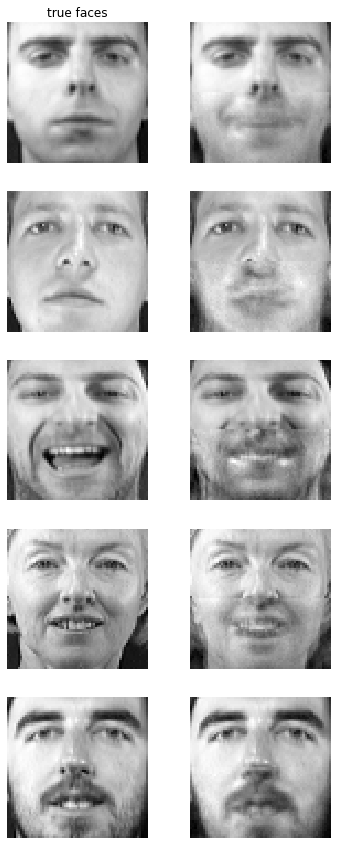

In [ ]:
# Пример кода:

n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )